## Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- **PassengerId**: A unique identifier for each passenger.
- **Survived**: Whether the passenger survived or not (0 = No, 1 = Yes).
- **Pclass (Ticket Class)**: The class of the ticket the passenger purchased (1 = 1st, 2 = 2nd, 3 = 3rd).
- **Name**: The name of the passenger.
- **Gender**: The gender of the passenger (male or female).
- **Age**: The age of the passenger. There are some missing values in this column.
- **SibSp (Number of Siblings/Spouses Aboard)**: The count of siblings or spouses aboard the Titanic.
- **Parch (Number of Parents/Children Aboard)**: The count of parents or children aboard the Titanic.
- **Ticket**: The ticket number.
- **Fare**: The amount of money paid for the ticket.
- **Cabin**: The cabin number where the passenger stayed. There are many missing values in this column.
- **Embarked**: The port where the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton).

In [3]:
## statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
## datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

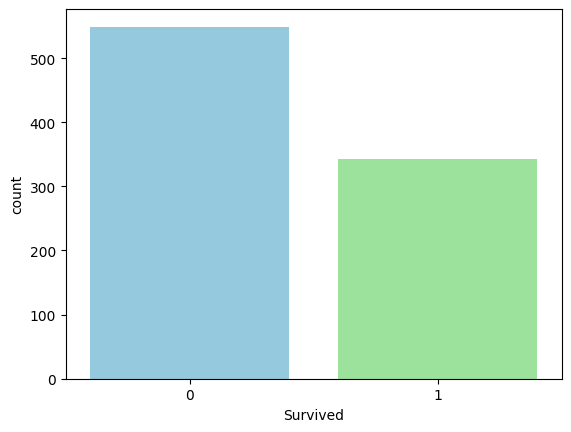

In [7]:
## categorical attributes
sns.countplot(x='Survived', data=train, palette=['skyblue', 'lightgreen','orange'])

<Axes: xlabel='Pclass', ylabel='count'>

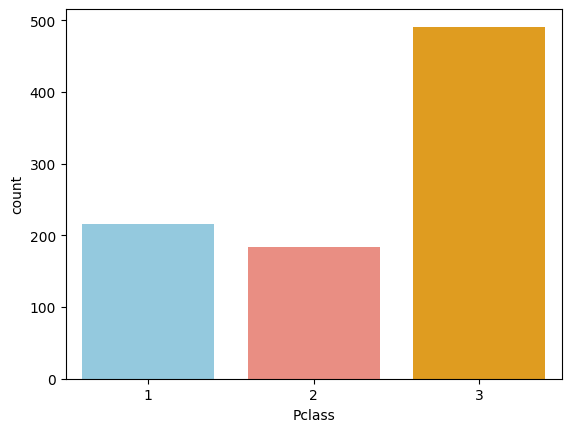

In [8]:
sns.countplot(x='Pclass', data=train, palette=['skyblue', 'salmon','orange'])

<Axes: xlabel='Gender', ylabel='count'>

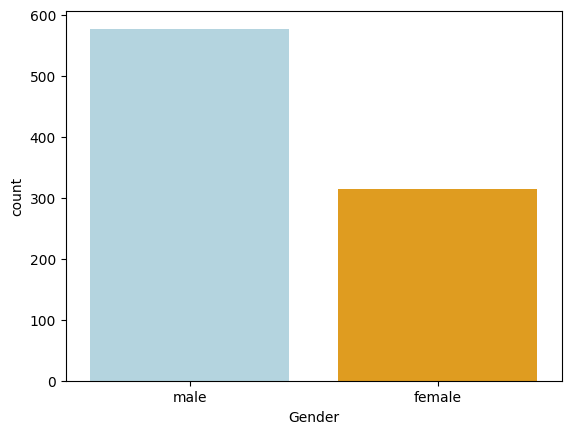

In [9]:
sns.countplot(x='Gender', data=train, palette=['lightblue','orange'])

<Axes: xlabel='SibSp', ylabel='count'>

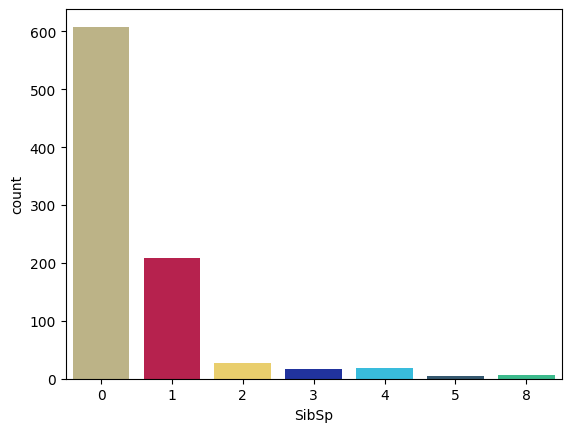

In [10]:
import random
num_colors = 7
random_colors = ['#%06x' % random.randint(0, 0xFFFFFF) for _ in range(num_colors)]
sns.countplot(x='SibSp', data=train, palette=random_colors)

<Axes: xlabel='Parch', ylabel='count'>

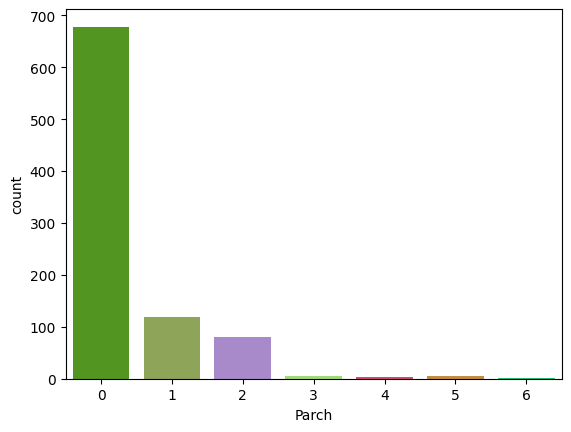

In [11]:
num_colors = 7
random_colors = ['#%06x' % random.randint(0, 0xFFFFFF) for _ in range(num_colors)]
sns.countplot(x='Parch', data=train, palette=random_colors)

<Axes: xlabel='Embarked', ylabel='count'>

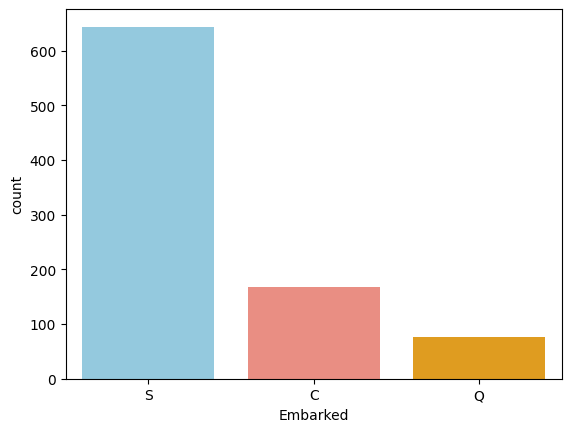

In [12]:
sns.countplot(x='Embarked', data=train, palette=['skyblue', 'salmon','orange'])

<Axes: xlabel='Age', ylabel='Density'>

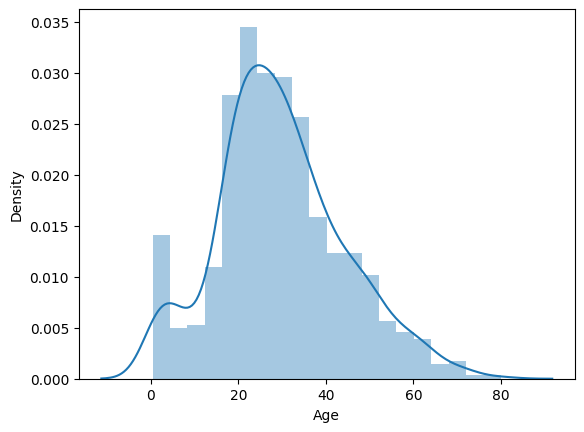

In [13]:
## numerical attributes
sns.distplot(train['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

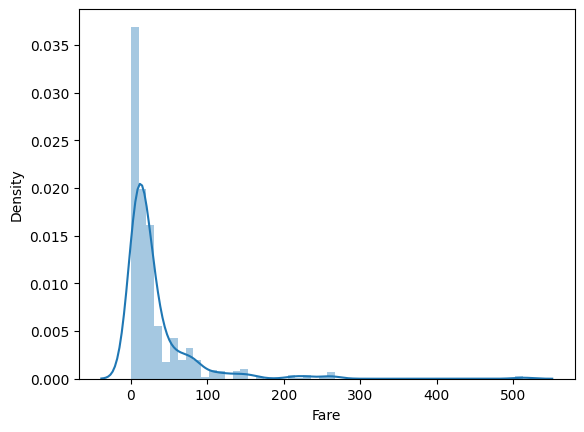

In [14]:
sns.distplot(train['Fare'])

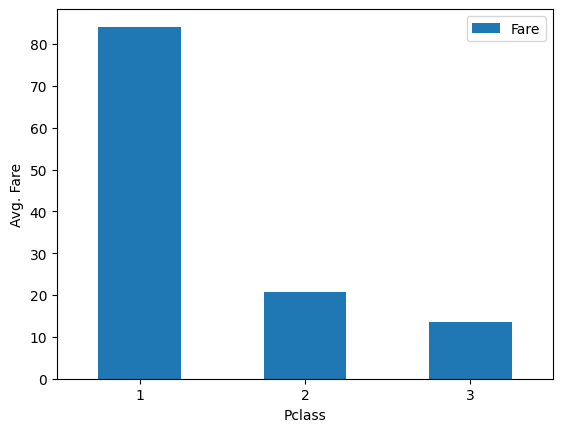

In [15]:
class_fare = train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

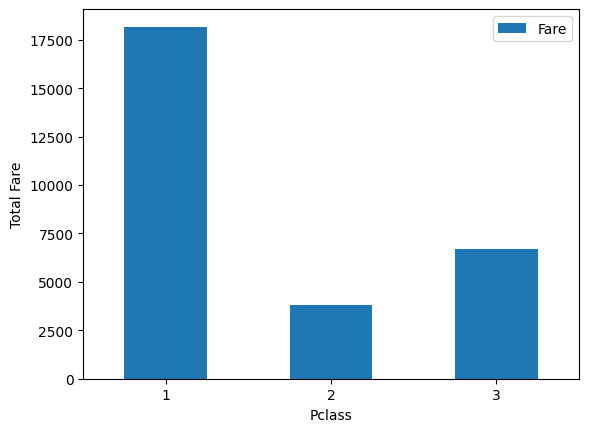

In [16]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

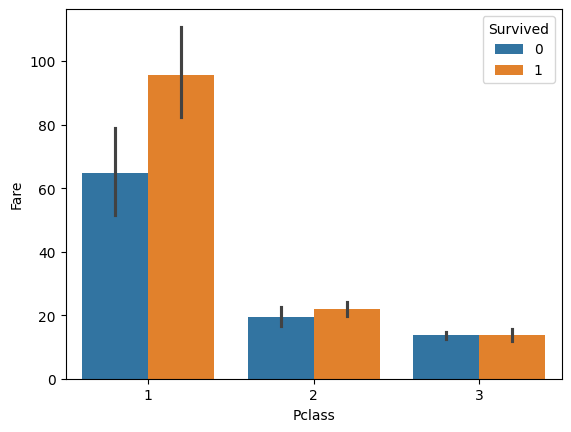

In [17]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

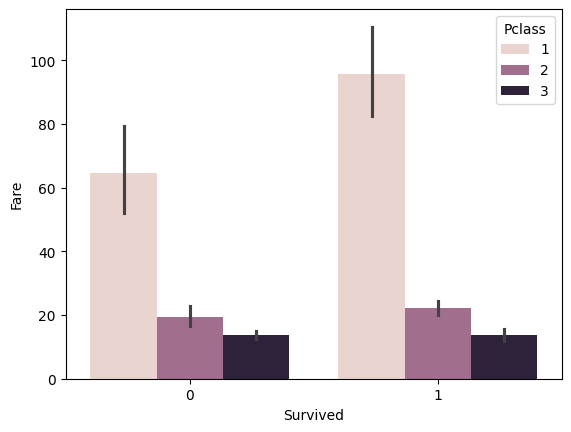

In [18]:
sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass')

## Data Preprocessing

In [19]:
train_len = len(train)
# combine two dataframes
df = pd.concat([train, test], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.tail()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [21]:
## find the null values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Gender            0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [22]:
# drop or delete the column
df = df.drop(columns=['Cabin'], axis=1)

In [23]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Gender           0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

In [24]:
df['Age'].mean()

29.881137667304014

In [25]:
# fill missing values using mean of the numerical column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [26]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [27]:
df['Embarked'].mode()[0]

'S'

In [28]:
# fill missing values using mode of the categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [29]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

## Log transformation for uniform data distribution

<Axes: xlabel='Fare', ylabel='Density'>

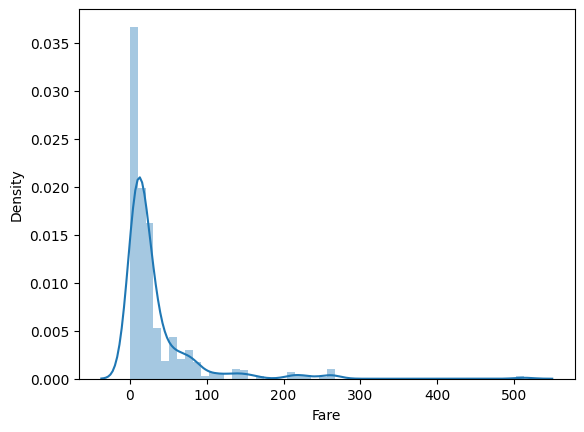

In [30]:
sns.distplot(df['Fare'])

In [31]:
df['Fare'] = np.log(df['Fare']+1)

<Axes: xlabel='Fare', ylabel='Density'>

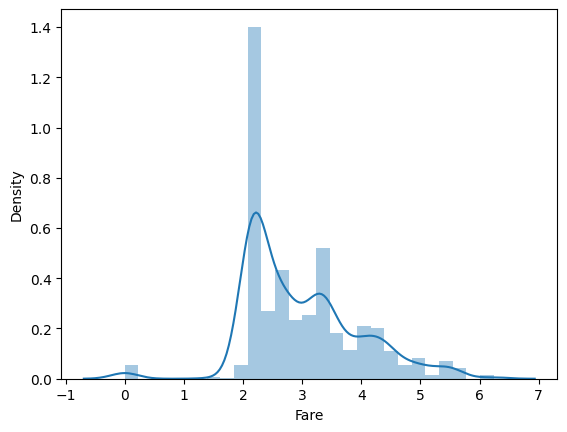

In [32]:
sns.distplot(df['Fare'])

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


In [34]:
## drop unnecessary columns
df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


## Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

cols = ['Gender', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])

df.head()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [36]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Gender           0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

## Train-Test Split

In [37]:
train_len

891

In [38]:
len(df)

1309

In [39]:
1309 - 891

418

In [40]:
train = df.iloc[:train_len, :] # .iloc[row,col] --> .iloc[20:100,2:4]
test = df.iloc[train_len:, :]

In [43]:
train.tail()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
886,887,0.0,2,1,27.000000,0,0,2.639057,2
887,888,1.0,1,0,19.000000,0,0,3.433987,2
888,889,0.0,3,0,29.881138,1,2,3.196630,2
889,890,1.0,1,1,26.000000,0,0,3.433987,0
890,891,0.0,3,1,32.000000,0,0,2.169054,1


In [42]:
test.head()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [44]:
# input split
X = train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train['Survived']

In [45]:
X.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


## Model Training

In [46]:
from sklearn.model_selection import train_test_split


def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Train Accuracy:', model.score(x_train, y_train))
    print('Test Accuracy:', model.score(x_test, y_test))
    

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Train Accuracy: 0.7934131736526946
Test Accuracy: 0.8071748878923767


In [48]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model)

Train Accuracy: 0.8308383233532934
Test Accuracy: 0.7802690582959642


In [49]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Train Accuracy: 0.9820359281437125
Test Accuracy: 0.726457399103139


In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Train Accuracy: 0.9820359281437125
Test Accuracy: 0.8071748878923767
